## Libraries

In [78]:
# This data set contains ...

# resource: https://data.world/health/breast-cancer-wisconsin

# Now all packages for analysis can be downloaded and the DataFrame can be definied

import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics

## Data

In [2]:
filename = ('breast-cancer-wisconsin-data.csv')

In [3]:
df = pd.read_csv(filename)

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Observation:
##### The DataFrame contains 32 columns and 569 rows and includes ID numbers for each of 569 patients, their diagnosis (either M - malignant or B - benign) and their 30 real-valued input features

## Overview and background of the DataFrame

### Summary of The DataFrame

##### Title:

Wisconsin Diagnostic Breast Cancer (WDBC)


##### Creators:

1. Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu 


##### Donor:

Nick Street


##### Date:

November 1995


##### Source:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


### DataFrame Description and Relevant Information

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information:
1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry 
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Statistical Analysis of the DataFrame

### DataFrame checks

In [5]:
# First step is to check if the DataFrame has any missing values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Observation:
##### The DataFrame doesn't have any missing values

In [6]:
# List of columns in the DataSet

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# 'id' column is a numeric column, but doesn't help in this analysis, so should be excluded

df.drop(['id'], axis = 1, inplace = True)

In [8]:
# let's replace non-numerical strings in 'diagnosis' column with numerical for easier analysis 
# 'M' replace with '1' for malignant and 'B' replace with '2' for benign

# resource: https://sparkbyexamples.com/pandas/pandas-replace-substring-in-dataframe/

df['diagnosis'] = df['diagnosis'].replace(['M','B'],[1,2])

In [9]:
# The updated DataFrame

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# Summary of the numerical data in the DataFrame

df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,1.627417,0.483918,1.000000,1.000000,2.000000,2.000000,2.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [11]:
summary = df.describe
print (summary())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     1.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      1.000000     6.981000      9.710000       43.790000   143.500000   
25%      1.000000    11.700000     16.170000       75.170000   420.300000   
50%      2.000000    13.370000     18.840000       86.240000   551.100000   
75%      2.000000    15.780000     21.800000      104.100000   782.700000   
max      2.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

#### Observations:
- the highest mean
-
-


In [12]:
# Let's check how the diagnosis is split by malignant (1) and benign (2) tumors

df.groupby(['diagnosis']).diagnosis.count()

diagnosis
1    212
2    357
Name: diagnosis, dtype: int64

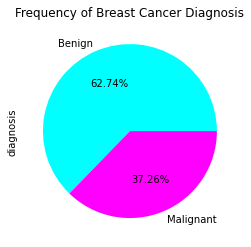

In [13]:
# Pie chart of the diagnosis

# resource: https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm
# resource: https://medium.com/geekculture/create-a-pie-chart-in-python-using-only-one-line-of-code-57bd974d8432

mylabels = ['Benign', 'Malignant']
mycolors = ['Aqua', 'Fuchsia']
plt.title('Frequency of Breast Cancer Diagnosis')

print = df['diagnosis'].value_counts().plot(kind='pie', labels = mylabels, colors = mycolors, autopct='%1.2f%%')

In [12]:
print("Logistic Regression:\n\n")

Logistic Regression:




#### Observations:
- From 569 patients 357 have benign tumor and 212 have malignant tumor
- This means that more patients have noncancers tumor
- 


### DataFrame visualisation

In [34]:
# Let's check correlation in the DatafRame

df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


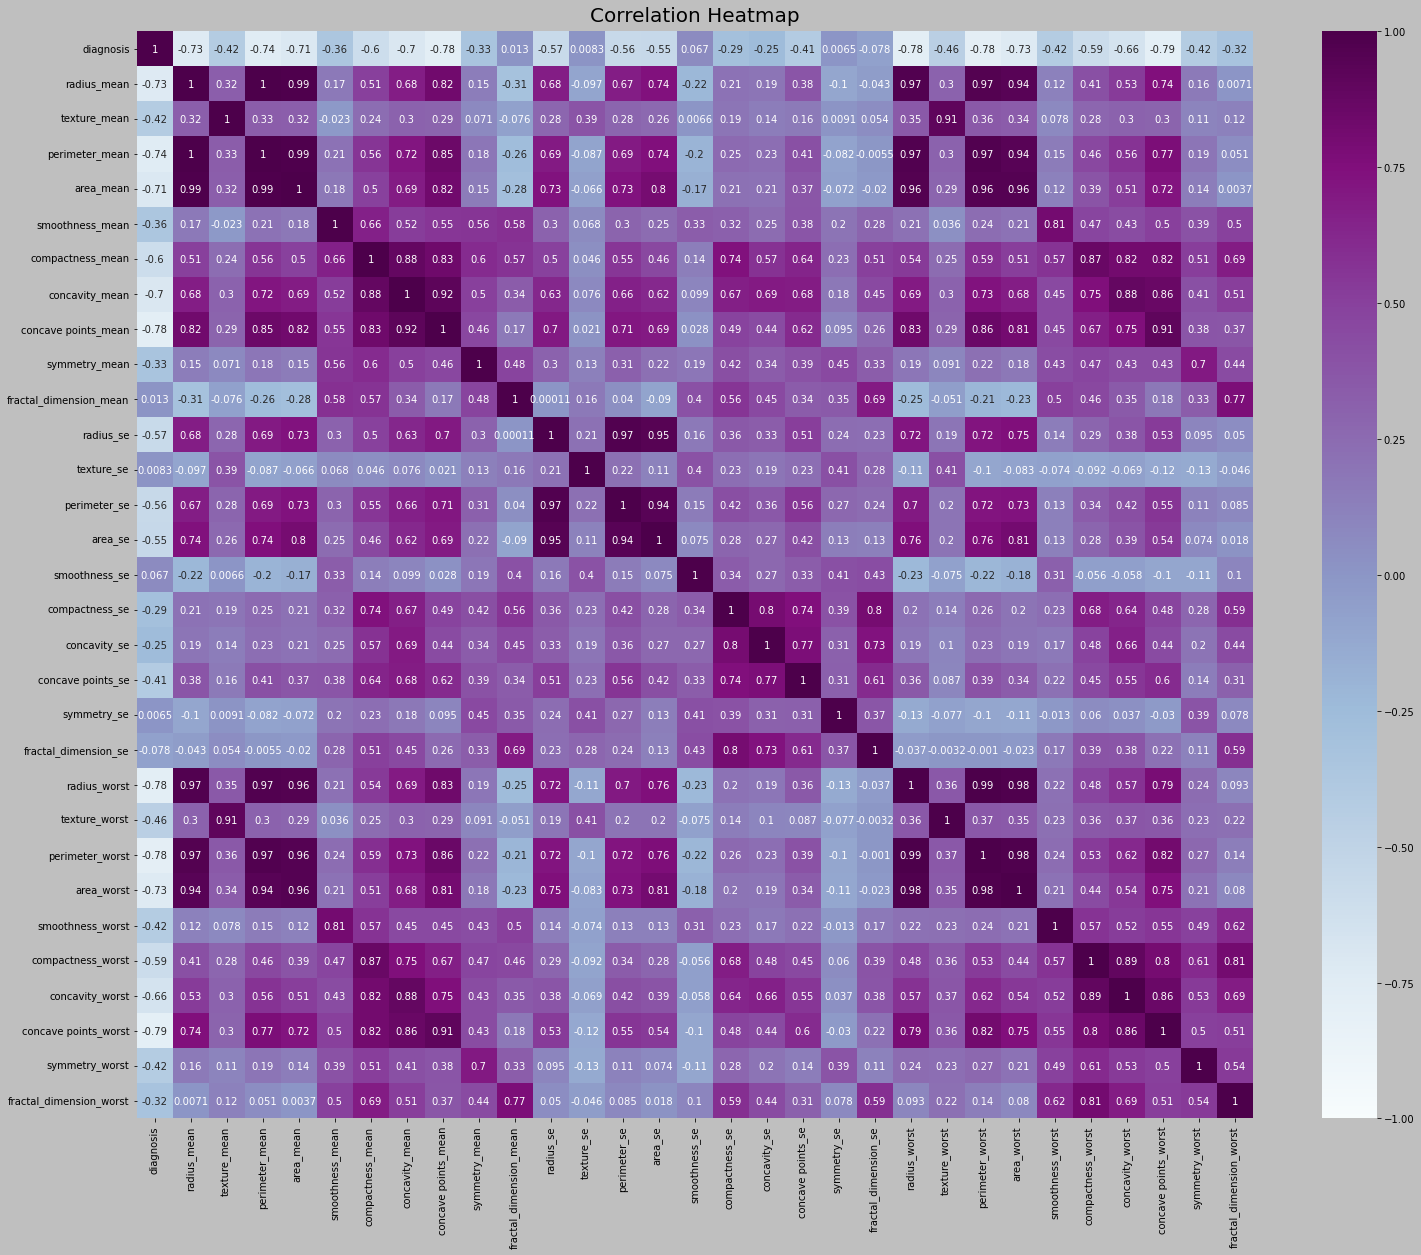

In [37]:
# Viualisation of correlation

# resource: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps
# resource: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BuPu', annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10)
plt.show()

In [38]:
# let's sort correlation values in 'diagnosis'

# resource: https://stackoverflow.com/questions/35420642/how-to-plot-a-graph-for-correlation-co-efficient-between-each-attributes-of-a-da

df_corr = df.corr()[['diagnosis']].sort_values(by='diagnosis')
df_corr

,diagnosis
concave points_worst,-0.793566
perimeter_worst,-0.782914
concave points_mean,-0.776614
radius_worst,-0.776454
perimeter_mean,-0.742636
area_worst,-0.733825
radius_mean,-0.730029
area_mean,-0.708984
concavity_mean,-0.696360
concavity_worst,-0.659610


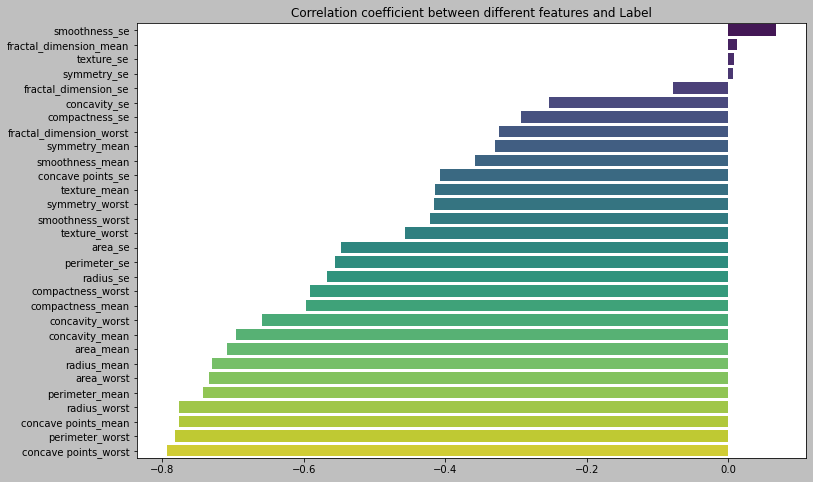

In [39]:
# Let's show the above in the barplot

# resource: https://www.kaggle.com/code/swagata14das/breast-cancer-prediction

plt.figure(figsize=(12,8))
data = df.corr()["diagnosis"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='viridis')
plt.title('Correlation coefficient between different features and Label')
plt.show()

#### Observation:
Strong correlations with 'diagnosis' occur in 'concave points-worst','perimeter_worst','radius_worst' and 'concave points-mean'

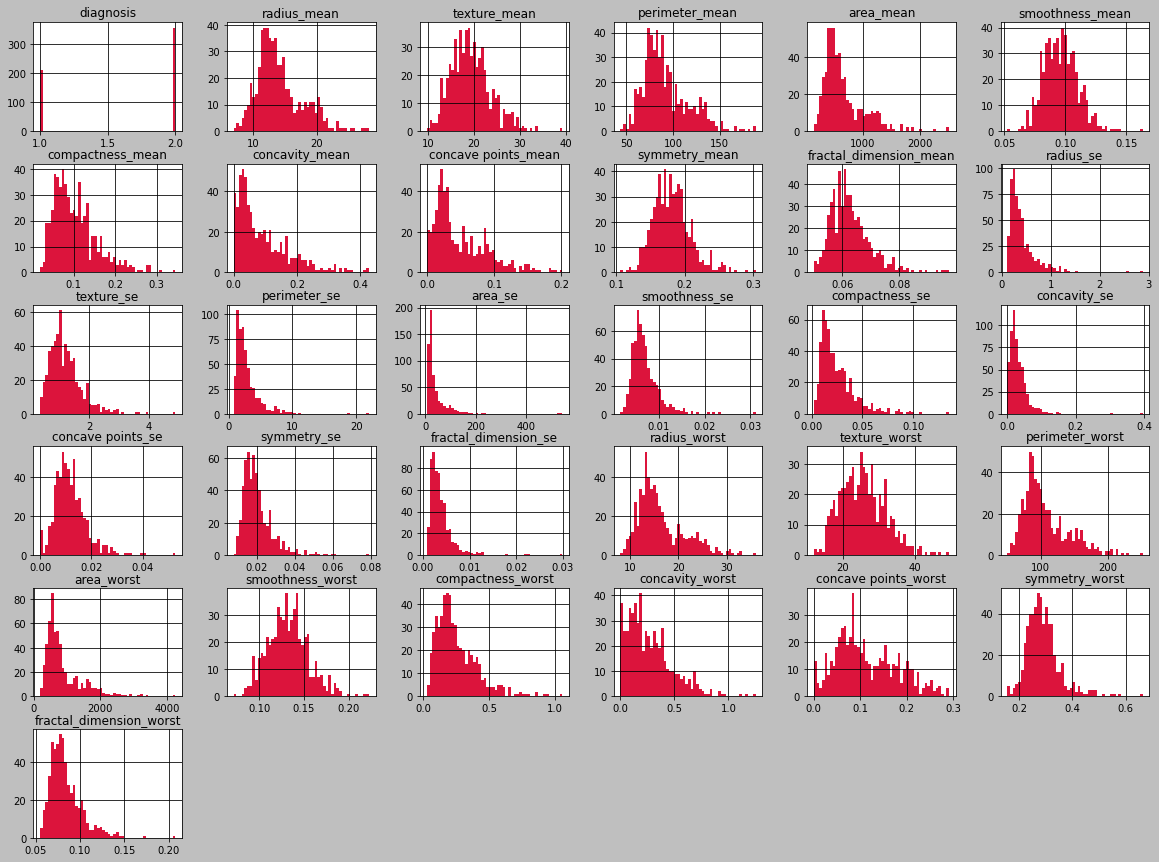

In [18]:
plt.style.use('grayscale')
df.hist(bins=50, figsize=(20, 15), color='Crimson')
plt.show()

In [19]:
sns.pairplot(df, hue='diagnosis',figsize=(20, 20))

TypeError: pairplot() got an unexpected keyword argument 'figsize'

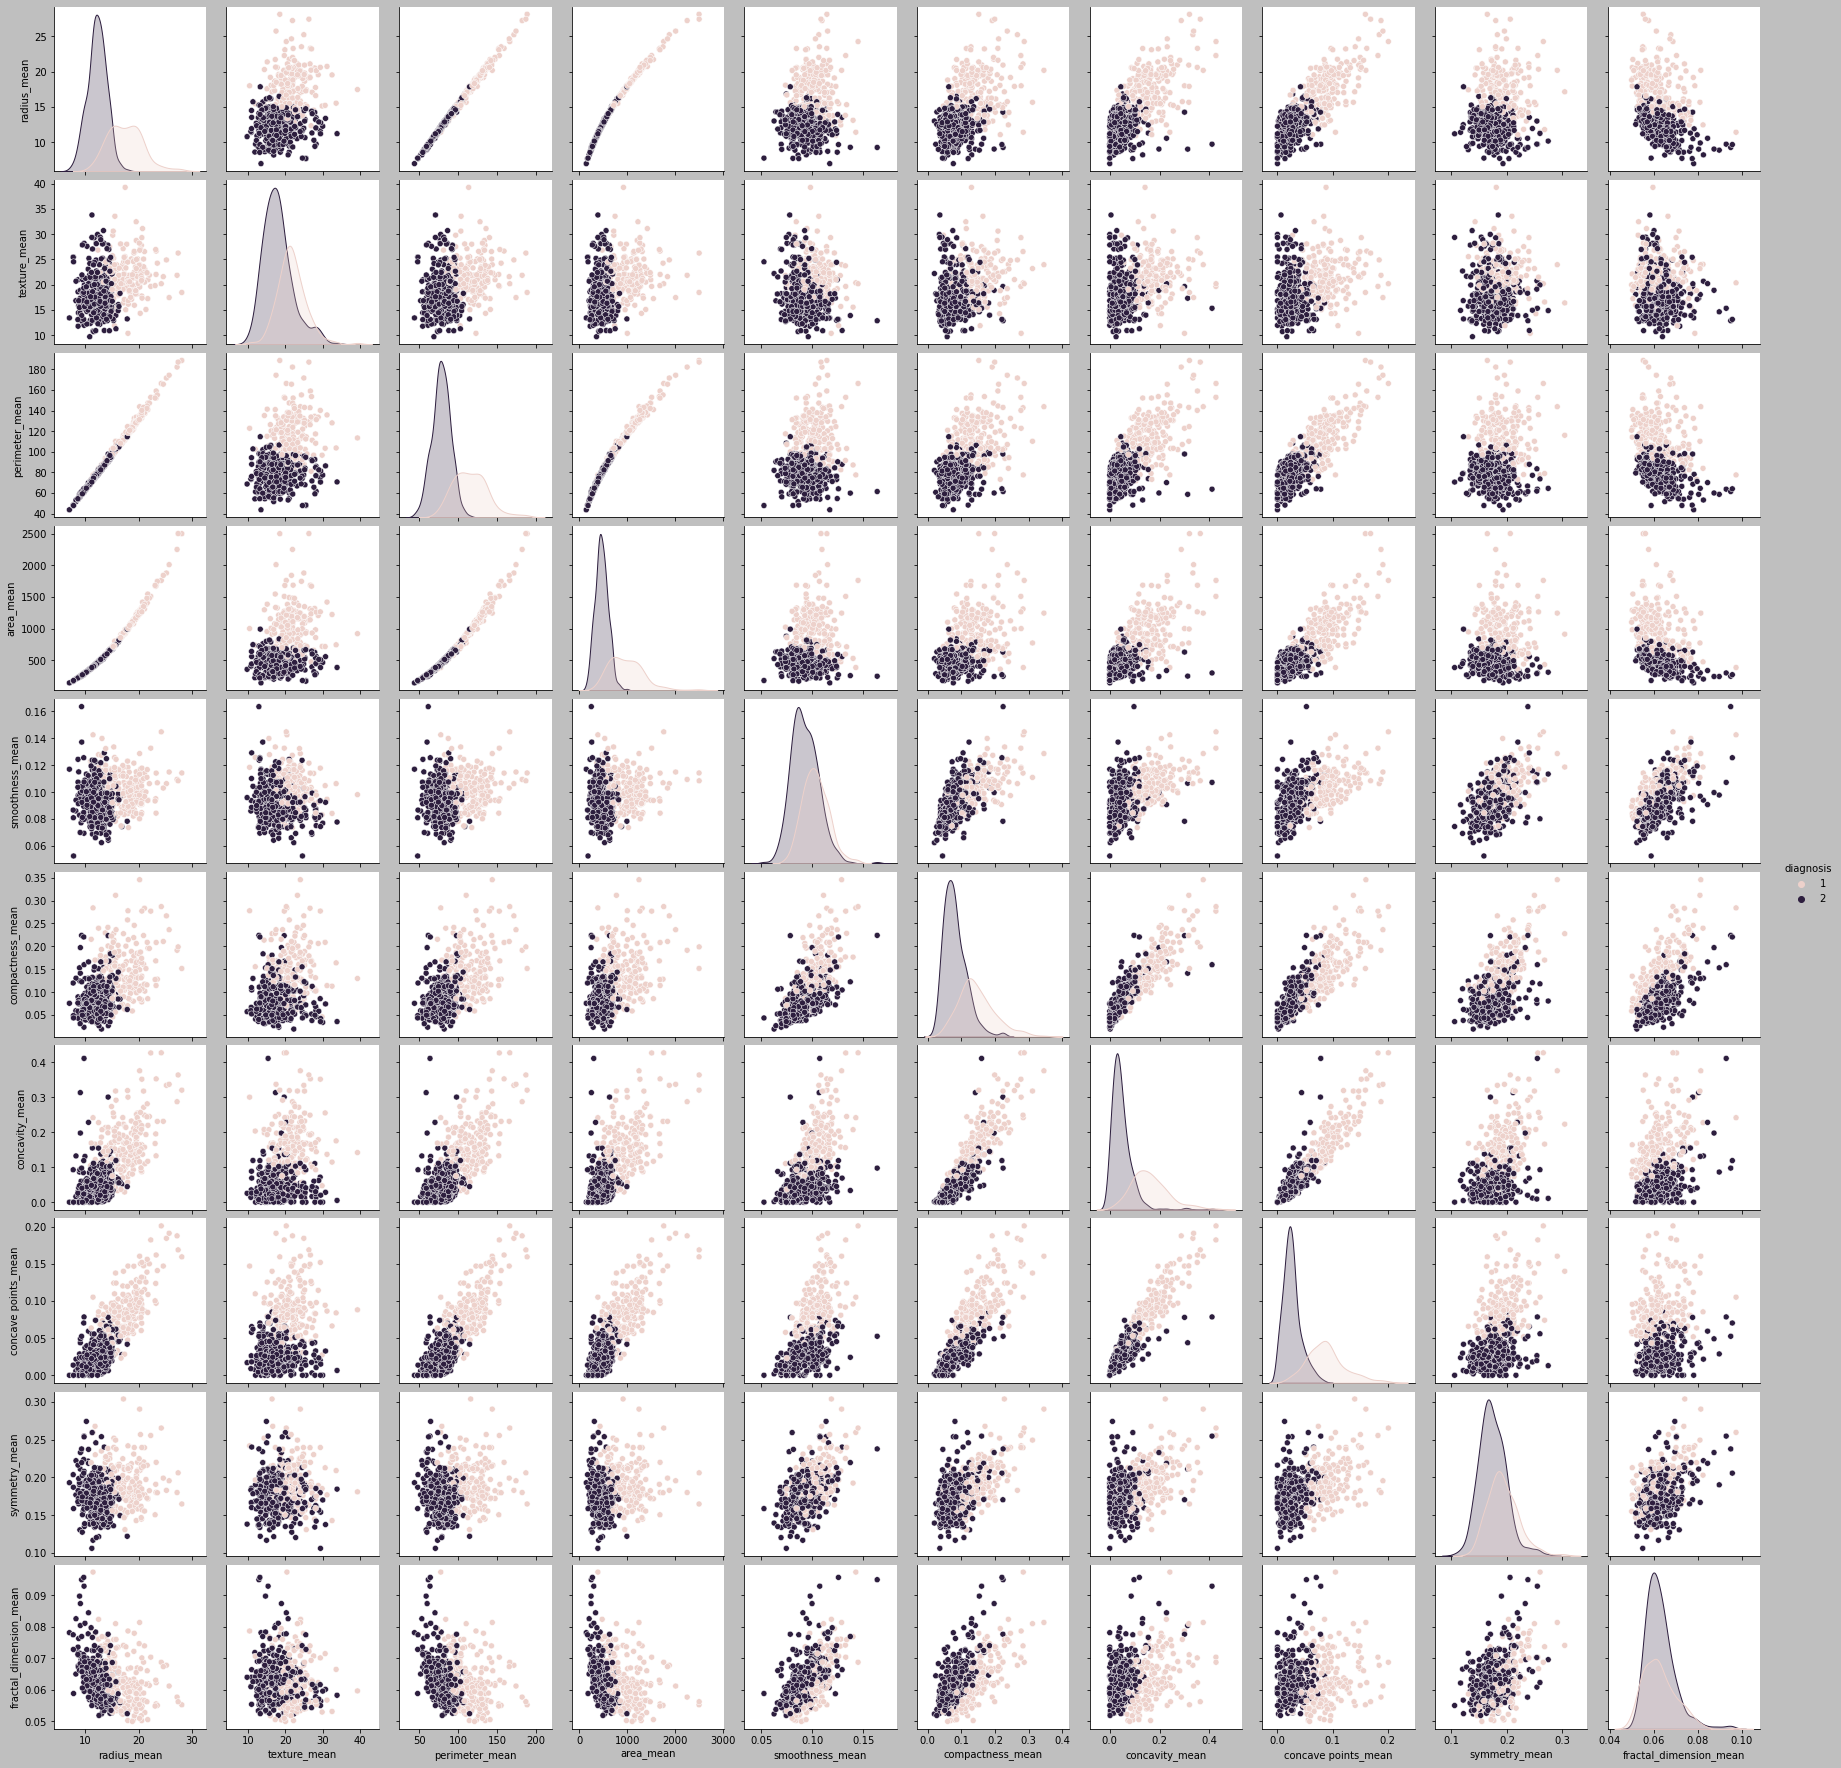

In [20]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.show()

In [ ]:
# Let's split the DataFrame into 3 groups according to their column names ('mean', 'se' and 'worst') 

df_mean = df.loc[:, df.columns.str.contains('_mean', 'diagnosis')]
df_se = df.loc[:, df.columns.str.contains('_se')]
df_worst = df.loc[:, df.columns.str.contains('_worst')]

In [ ]:
df_mean.describe().T

In [ ]:
fig, ax = plt.subplots(8, 4, figsize=(20, 20))
ax = ax.flatten()

for i, var in enumerate(num):
    sns.histplot(data = df_mean, x = var, hue = 'diagnosis', kde = True, ax = ax[i])
    ax[i].set_title(f"{var}: Survived vs Not Survived")
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [ ]:
df_mean.hist(figsize=(15,10), color='DarkMagenta')

In [ ]:
df_se.describe().T

In [ ]:
df_se.hist(figsize=(15,10), color='DeepPink')

In [ ]:
df_worst.describe().T

In [ ]:
df_worst.hist(figsize=(15,10), color='DodgerBlue')

## Machine Learning

In [13]:
#resource: https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe

dict(df.dtypes)

{'diagnosis': dtype('int64'),
 'radius_mean': dtype('float64'),
 'texture_mean': dtype('float64'),
 'perimeter_mean': dtype('float64'),
 'area_mean': dtype('float64'),
 'smoothness_mean': dtype('float64'),
 'compactness_mean': dtype('float64'),
 'concavity_mean': dtype('float64'),
 'concave points_mean': dtype('float64'),
 'symmetry_mean': dtype('float64'),
 'fractal_dimension_mean': dtype('float64'),
 'radius_se': dtype('float64'),
 'texture_se': dtype('float64'),
 'perimeter_se': dtype('float64'),
 'area_se': dtype('float64'),
 'smoothness_se': dtype('float64'),
 'compactness_se': dtype('float64'),
 'concavity_se': dtype('float64'),
 'concave points_se': dtype('float64'),
 'symmetry_se': dtype('float64'),
 'fractal_dimension_se': dtype('float64'),
 'radius_worst': dtype('float64'),
 'texture_worst': dtype('float64'),
 'perimeter_worst': dtype('float64'),
 'area_worst': dtype('float64'),
 'smoothness_worst': dtype('float64'),
 'compactness_worst': dtype('float64'),
 'concavity_worst':

In [14]:
# resource: https://www.ritchieng.com/pandas-changing-datatype/

df['diagnosis'] = df.diagnosis.astype(float)

In [15]:
df.dtypes

diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# resource: https://stackoverflow.com/questions/8924173/how-can-i-print-bold-text-in-python

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [80]:
# Creating training - splitting DataFrame into training 80% and testing 20%

# resource: https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples

x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=1)
x_train.shape, y_train.shape

((455, 30), (455,))

In [190]:
# Checking 5 different models for breast cancer prediction:
# 1st - LogisticRegression
# 2nd - LinearRegression
# 3rd - RandomForestClassifier
# 4th - GaussianNB
# 5th - KNeighborsClassifier

# resource: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

# Creating 1st Model - LogisticRegression

# After checking different parameters for penalty ('liblinear', 'newton-cg', 'sag' & 'saga'), 
# it seems that 'newton-cg' gives the highest score of the model, thus this will be used in the prediction

# resource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# resource: https://stackoverflow.com/questions/68799909/classification-accuracy-with-sklearn-in-percentage

Model1 = LogisticRegression(solver ='newton-cg').fit(x_train,y_train)
print(f'Model score of LogisticRegression is:\n')
print(color.BOLD + f'{Model1.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of LogisticRegression is:

96.26%


In [82]:
# Predicting results with LogisticRegression Model

Prediction1 = Model1.predict(x_test)

In [83]:
# Actual breast cancer when using LogisticRegression Model

y_test.values

array([2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [84]:
# Predicted breast cancer when using LogisticRegression Model

Prediction1

array([1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [189]:
# Accuracy score of LogisticRegression Model

print(f'Accuracy score of LogisticRegression Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction1,y_test)*100:.2f}%'+ color.END)

Accuracy score of LogisticRegression Model is:

94.74%


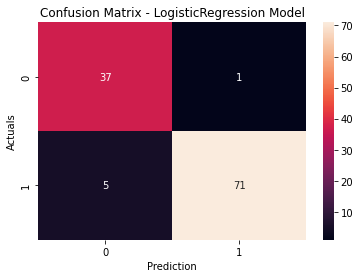

In [144]:
# Confusion Matrix for LogisticRegression Model

# resource: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

sns.heatmap(confusion_matrix(Prediction1,y_test),annot=True)
plt.title('Confusion Matrix - LogisticRegression Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

In [192]:
# Classification Report for LogisticRegression Model

print(color.BOLD +'Classification Report for LogisticRegression Model:\n\n'
      + color.END, classification_report(Prediction1,y_test))

Classification Report for LogisticRegression Model:

               precision    recall  f1-score   support

         1.0       0.88      0.97      0.93        38
         2.0       0.99      0.93      0.96        76

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [188]:
# Creating 2nd Model - LinearRegression

# resource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Model2 = LinearRegression().fit(x_train,y_train)
print(f'Model score of LinearRegression is:\n')
print(color.BOLD + f'{Model2.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of LinearRegression is:

78.04%


In [89]:
# Predicting results with LinearRegression Model

Prediction2 = Model2.predict(x_test)

# When model is run, it gives figures in continous form, so they need to be rounded to zero decimal places

# resource: https://careerkarma.com/blog/python-round/

Prediction2 = Prediction2.round().astype(int)

In [90]:
# Actual breast cancer when using LinearRegression Model

y_test.values

array([2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [91]:
# Predicted breast cancer when using LinearRegression Model

Prediction2

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2])

In [187]:
# Accuracy score of LinearRegression Model

print(f'Accuracy score of LinearRegression Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction2,y_test)*100:.2f}%'+ color.END)

Accuracy score of LinearRegression Model is:

94.74%


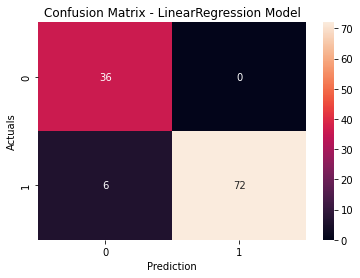

In [145]:
# Confusion Matrix for LinearRegression Model

sns.heatmap(confusion_matrix(Prediction2,y_test), annot=True)
plt.title('Confusion Matrix - LinearRegression Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

- Top left quadrant = True Positives = Number of benign labelled as benign
- Bottom right quadrant = True Negatives = Number of malignant labelled as malignant
- Top right quadrant = False Positives = Number of benign labelled as malignant
- Bottom left quadrant = False Negatives = Number of malignant labelled as benign

In [193]:
# Classification Report for LinearRegression Model

print(color.BOLD +'Classification Report for LinearRegression Model:\n\n'
      + color.END, classification_report(Prediction2,y_test))

Classification Report for LinearRegression Model:

               precision    recall  f1-score   support

           1       0.86      1.00      0.92        36
           2       1.00      0.92      0.96        78

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



Our model's poor accuracy score indicates that our regressive model did not match the current data very well. This implies that our data is ineligible for linear regression. However, a dataset may accept a linear regressor if only a portion of it is considered. Let us investigate that option.

In [186]:
# Creating 3rd Model - RandomForestClassifier

# resource: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Model3 = RandomForestClassifier().fit(x_train,y_train)
print(f'Model score of RandomForestClassifier is:\n')
print(color.BOLD + f'{Model3.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of RandomForestClassifier is:

100.00%


In [96]:
# Predicting results with RandomForestClassifier Model

Prediction3 = Model3.predict(x_test)

In [97]:
# Actual breast cancer when using RandomForestClassifier Model

y_test.values

array([2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [98]:
# Predicted breast cancer when using RandomForestClassifier Model

Prediction3

array([1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [194]:
# Accuracy score of RandomForestClassifier Model

print(f'Accuracy score of RandomForestClassifier Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction3,y_test)*100:.2f}%'+ color.END)

Accuracy score of RandomForestClassifier Model is:

94.74%


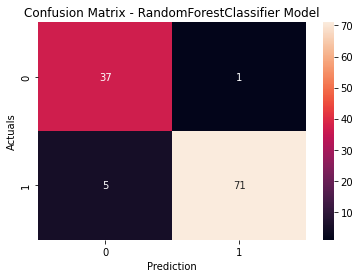

In [146]:
# Confusion Matrix for RandomForestClassifier Model

sns.heatmap(confusion_matrix(Prediction3,y_test), annot=True)
plt.title('Confusion Matrix - RandomForestClassifier Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

In [195]:
# Classification Report for RandomForestClassifier Model

print(color.BOLD +'Classification Report for RandomForestClassifier Model:\n\n'
      + color.END, classification_report(Prediction3,y_test))

Classification Report for RandomForestClassifier Model:

               precision    recall  f1-score   support

         1.0       0.88      0.97      0.93        38
         2.0       0.99      0.93      0.96        76

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [196]:
# Creating 4th Model - GaussianNB

# resource: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Model4 = GaussianNB().fit(x_train,y_train)
print(f'Model score of GaussianNB is:\n')
print(color.BOLD + f'{Model4.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of GaussianNB is:

94.07%


In [103]:
# Predicting results with GaussianNB Model

Prediction4 = Model4.predict(x_test)

In [104]:
# Actual breast cancer when using GaussianNB Model

y_test.values

array([2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [105]:
# Predicted breast cancer when using GaussianNB Model

Prediction4

array([1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.])

In [197]:
# Accuracy score of GaussianNB Model

print(f'Accuracy score of GaussianNB Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction4,y_test)*100:.2f}%'+ color.END)

Accuracy score of GaussianNB Model is:

94.74%


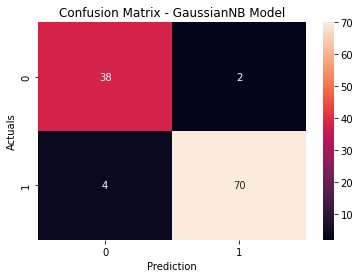

In [147]:
# Confusion Matrix for GaussianNB Model

sns.heatmap(confusion_matrix(Prediction4,y_test), annot=True)
plt.title('Confusion Matrix - GaussianNB Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

In [198]:
# Classification Report for GaussianNB Model

print(color.BOLD +'Classification Report for GaussianNB Model:\n\n'
      + color.END, classification_report(Prediction4,y_test))

Classification Report for GaussianNB Model:

               precision    recall  f1-score   support

         1.0       0.90      0.95      0.93        40
         2.0       0.97      0.95      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [199]:
# Creating 5th Model - KNeighborsClassifier

# resource: # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Model5 = KNeighborsClassifier(n_neighbors=5,leaf_size=30, weights='uniform').fit(x_train,y_train)
print(f'Model score of KNeighborsClassifier is:\n')
print(color.BOLD + f'{Model5.score(x_train,y_train)*100:.2f}%'+ color.END)

Model score of KNeighborsClassifier is:

94.73%


In [110]:
# Predicting results with KNeighborsClassifier Model

Prediction5 = Model5.predict(x_test)

In [111]:
# Actual breast cancer when using KNeighborsClassifier Model

y_test.values

array([2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.])

In [112]:
# Predicted breast cancer when using KNeighborsClassifier Model

Prediction5

array([1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.])

In [200]:
# Accuracy score of KNeighborsClassifier Model

print(f'Accuracy score of KNeighborsClassifier Model is:\n')
print(color.BOLD + f'{accuracy_score(Prediction5,y_test)*100:.2f}%'+ color.END)

Accuracy score of KNeighborsClassifier Model is:

93.86%


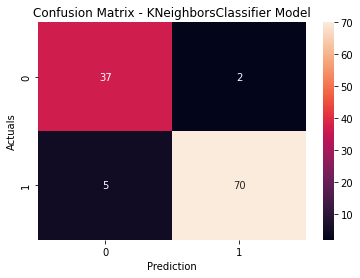

In [148]:
# Confusion Matrix for KNeighborsClassifier Model

sns.heatmap(confusion_matrix(Prediction5,y_test), annot=True)
plt.title('Confusion Matrix - KNeighborsClassifier Model')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()

In [201]:
# Classification Report for KNeighborsClassifier Model

print(color.BOLD +'Classification Report for KNeighborsClassifier Model:\n\n'
      + color.END, classification_report(Prediction5,y_test))

Classification Report for KNeighborsClassifier Model:

               precision    recall  f1-score   support

         1.0       0.88      0.95      0.91        39
         2.0       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## Results Comparision

In [211]:
# Models score comparision

print(color.BOLD + f'LogisticRegression Model score is: {Model1.score(x_train,y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + color.RED + f'LinearRegression Model score is: {Model2.score(x_train,y_train)*100:.2f}%'
      + color.END,'\n')
print(color.BOLD + color.GREEN + f'RandomForestClassifier Model score is: {Model3.score(x_train,y_train)*100:.2f}%'
      + color.END,'\n')
print(color.BOLD + f'GaussianNB Model score is: {Model4.score(x_train,y_train)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'KNeighborsClassifier Model score is: {Model5.score(x_train,y_train)*100:.2f}%'+ color.END)

LogisticRegression Model score is: 96.26% 

LinearRegression Model score is: 78.04% 

RandomForestClassifier Model score is: 100.00% 

GaussianNB Model score is: 94.07% 

KNeighborsClassifier Model score is: 94.73%


#### Observation:
##### The best Model score

In [214]:
# Models accuracy comparision

print(color.BOLD + f'LogisticRegression Model accuracy is: {accuracy_score(Prediction1,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'LinearRegression Model accuracy is: {accuracy_score(Prediction2,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'RandomForestClassifier Model accuracy is: {accuracy_score(Prediction3,y_test)*100:.2f}%'
      + color.END,'\n')
print(color.BOLD + f'GaussianNB Model accuracy is: {accuracy_score(Prediction4,y_test)*100:.2f}%'+ color.END,'\n')
print(color.BOLD + f'KNeighborsClassifier Model accuracy is: {accuracy_score(Prediction5,y_test)*100:.2f}%'+ color.END)

LogisticRegression Model accuracy is: 94.74% 

LinearRegression Model accuracy is: 94.74% 

RandomForestClassifier Model accuracy is: 94.74% 

GaussianNB Model accuracy is: 94.74% 

KNeighborsClassifier Model accuracy is: 93.86%


#### Observation:


In [223]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = [{0:.2}.format(value) for value in
                     confusion_matrix(Prediction1,y_test).flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(Prediction1,y_test), annot=labels, cmap='Blues')

NameError: name 'cf_matrix' is not defined

In [ ]:
# Confusion matrix comparision

# resource: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

sns.heatmap(confusion_matrix(Prediction1,y_test), annot=True)
sns.heatmap(confusion_matrix(Prediction2,y_test), annot=True)
sns.heatmap(confusion_matrix(Prediction3,y_test), annot=True)
sns.heatmap(confusion_matrix(Prediction4,y_test), annot=True)
sns.heatmap(confusion_matrix(Prediction5,y_test), annot=True)

In [141]:
# Classification Reports comparision

# resource: https://www.jcchouinard.com/classification-report-in-scikit-learn/
# resource: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/

print(color.BOLD +'LogisticRegression Classification Report:\n\n'+ color.END, classification_report(Prediction1,y_test))
print(color.BOLD +'LinearRegression Classification Report:\n\n'+ color.END, classification_report(Prediction2,y_test))
print(color.BOLD +'RandomForestClassifier Classification Report:\n\n'+ color.END, classification_report(Prediction3,y_test))
print(color.BOLD +'GaussianNB Classification Report:\n\n'+ color.END, classification_report(Prediction4,y_test))
print(color.BOLD +'KNeighborsClassifier Classification Report:\n\n'+ color.END, classification_report(Prediction5,y_test))

LogisticRegression Classification Report:

               precision    recall  f1-score   support

         1.0       0.88      0.97      0.93        38
         2.0       0.99      0.93      0.96        76

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

LinearRegression Classification Report:

               precision    recall  f1-score   support

           1       0.86      1.00      0.92        36
           2       1.00      0.92      0.96        78

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114

RandomForestClassifier Classification Report:

               precision    recall  f1-score   support

         1.0       0.88      0.97      0.93        38
         2.0       0.99      0.93      0.96        76

    accuracy                           0.95     

#### Observations:
**1.** <u>Precision</u>
- The precision is the accuracy of positive breast cancer predictions
- When the number is high, it means that not many 'true' values were predicted as 'false'
- The **<u>highest</u>** precision of positive breast cancer predictions for **Malignant** tumor is when using **GaussianNB Model (90%)** 
- The **<u>highest</u>** precision of positive predictions for **Benign** tumor is when using **LinearRegression Model (100%)** 

**2.** <u>Recall</u>
- The recall is the sensitivity of the fraction of correctly identified positive breast cancer predictions
- When the number is high, it means that most 'true' values were predicted correctly
- The **<u>highest</u>** recall of correctly identified positive breast cancer predictions for **Malignant** tumor is when using **LinearRegression Model (100%)**
- The **<u>highest</u>** recall of correctly identified positive predictions for **Benign** tumor is when using **GaussianNB Model (95%)** 

**3.** <u>F1-score</u>
- The f1-score is the measure of precision and recall at the same time by finding the harmonic mean of the two values
- This number is useful when we get the opposite values when calculating precision and recall
- To get the **<u>highest</u>** f1-score of **93%** for **Malignant** tumor prediction, we can use either **LogisticRegression, RandomForestClassifier** or **GaussianNB Model**
- To get the **<u>highest</u>** f1-score of **96%** for **Benign** tumor prediction, we can use **almost all Models**, except KNeighborsClassifier

**4.** <u>Support</u>
- The support is the number of occurences of each class in the y-test

**5.** <u>Accuracy</u>
- The accuracy is the measure of the accuracy of all predictions, either positive or negative
- When the number is high, it means that most predictions are accurate
- The accuracy of all models is **high** and is **95%** for first four and **94%** for KNeighborsClassifier

## How the Data could be extended?

In [ ]:
# 'M' replace with '1' for malignant and 'B' replace with '2' for benign

## Conclusion

# Additional 

In [ ]:
# 'id' column is a numeric column, but doesn't help in this analysis, so should be excluded

# resource: https://www.geeksforgeeks.org/how-to-exclude-columns-in-pandas/

df.loc[:, df.columns != 'id']

In [ ]:
# resource: https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas

skipcols = ['id']
df1 = pd.read_csv(filename, usecols=lambda x: x not in skipcols, index_col=0)
df1

In [ ]:
# let's replace non-numerical strings in 'diagnosis' column with numerical for easier analysis 
# 'M' replace with '1' for malignant and 'B' replace with '2' for benign

# resource: https://sparkbyexamples.com/pandas/pandas-replace-substring-in-dataframe/

df1 = df.replace({'M': 1, 'B': 2}, regex=True)

In [ ]:
# Let's split the DataFrame into 3 groups according to their column names ('mean', 'se' and 'worst') 

df1_mean = df1.groupby(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
df1_se = df1.groupby(['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'])
df1_worst = df1.groupby(['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])